<a href="https://colab.research.google.com/github/obaidsi/Audio-mixer-LTspice/blob/main/AudioMixer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Introduction**

---
This project builds a complete analog audio mixing console as a modular signal chain and validates each stage using LTspice simulation. The work is based on a structured set of lab specifications (Lab 2 → Lab 3 → Lab 4), but it is presented here as an engineering build-and-verify project rather than a lab report.

The goal is to develop practical confidence with:

Op-amp real-world limitations (slew rate and large-signal behavior)

Active analog building blocks used in audio: voltage follower, summing amplifier, integrator (with stabilization), differentiator, and equalizer sections

Frequency-response verification (Bode magnitude/phase) and time-domain verification (transient behavior)

System integration using a block-level approach (subcircuits/hierarchy) and verifying the final end-to-end response

Each stage will be implemented in LTspice, measured with consistent test setups, and documented in this Colab notebook with schematic screenshots + plot screenshots + short engineering notes.*italicized text*



**Final System Diagram**
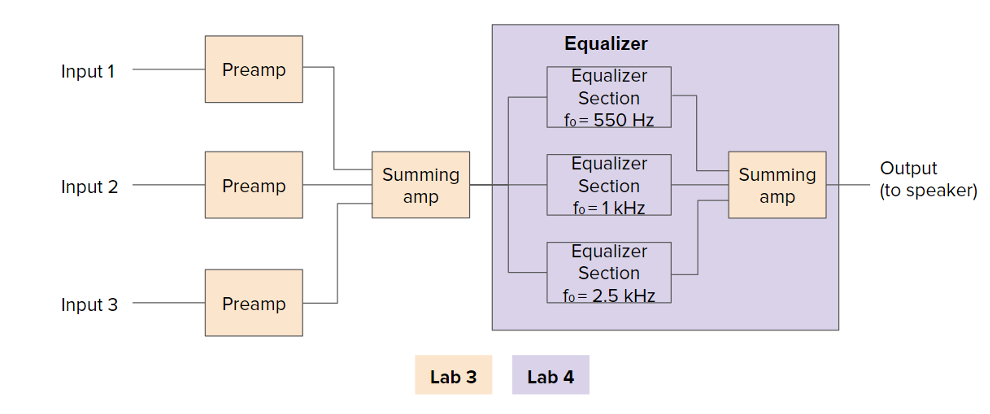

**Phase 0**— Project Setup & Documentation Rules (applies to every step)

Why this matters: keeps your notebook clean and “professional engineering log” style.

Standard simulation settings (use consistently):

Supplies: ±12 V unless the step says otherwise

AC Sweep (audio band): 20 Hz → 20 kHz, log scale (e.g., 100 pts/dec)

Extended sweeps (when required): 1 Hz → 1 MHz or 200 kHz depending on step

Always show:

screenshot of schematic

screenshot of Bode plot (magnitude in dB; phase shown when relevant)

screenshot of transient waveform when requested

Notebook template for each step:

Goal (1–2 lines)

Circuit (LTspice schematic screenshot)

Simulation setup (what analysis + parameters)

Results (plots + cursor measurements)

Notes (3–6 bullets: what you learned / what limitation appears)

**Procedure 1 – Voltage Follower**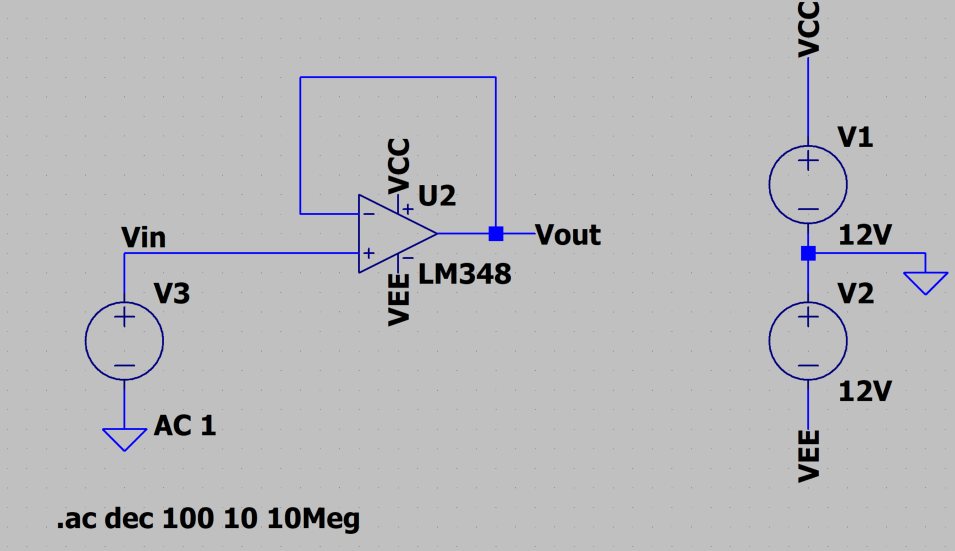

**Analysis 1.1** — Slew Rate (Transient)

Purpose
This simulation measures the op-amp’s slew rate using a voltage follower configuration.
The goal is to verify that the simulated output transition time matches the datasheet slew rate reported in Prelab 2.1.

What is checked

Output rise/fall time after an input transition

Slew rate computed as ΔV/Δt

Agreement with the datasheet value

Note on Rise Time Measurement:
This screenshot shows the measured rise time of the voltage follower circuit. We placed cursors at the 10% and 90% levels of the output transition and found a rise time of approximately 31.88 µs. This corresponds to a slew rate of around 0.56 V/µs, which is very close to the 0.5 V/µs specified in the op-amp datasheet. This confirms that the simulation results align well with the expected real-world performance.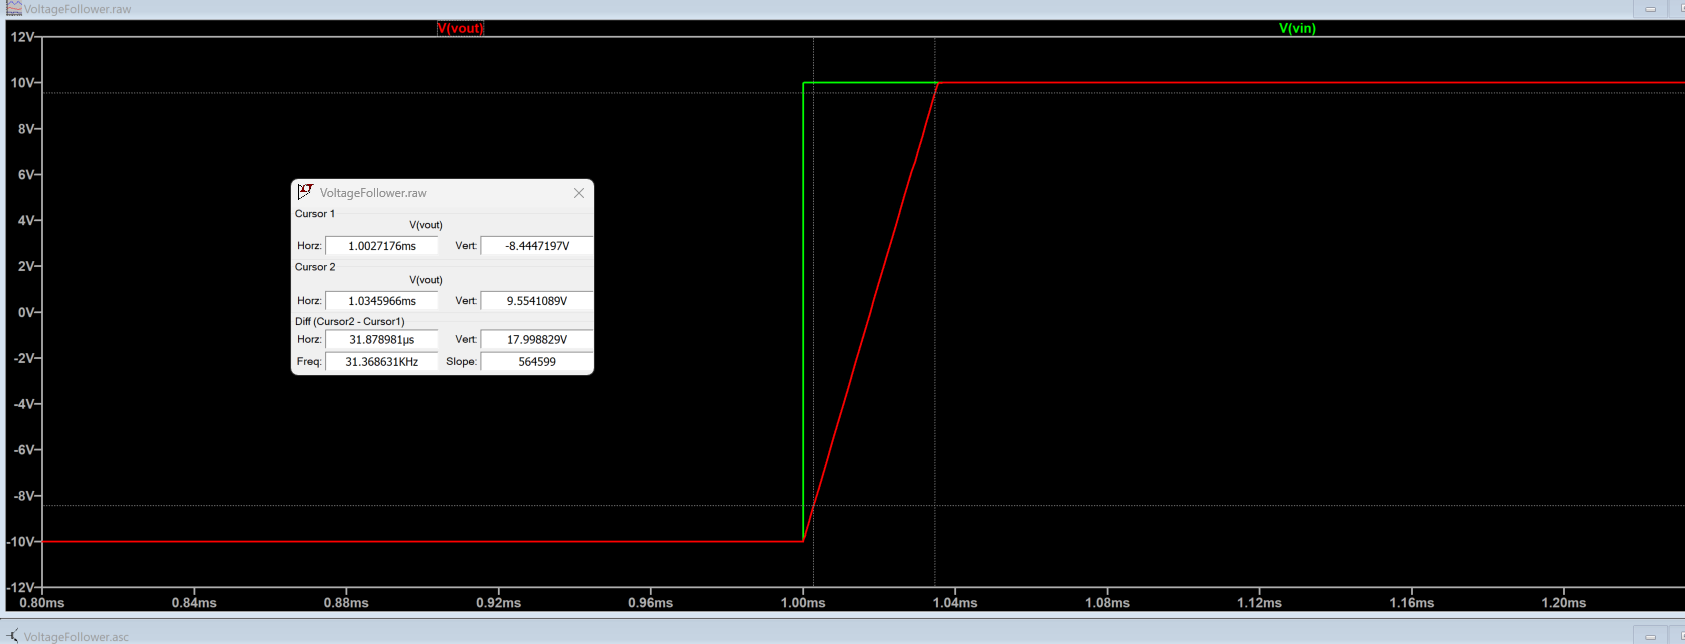

**Analysis1.2:** for Transient Sine Wave Analysis:
In the transient analysis with a 3 V amplitude sine wave, we observed that distortion begins to become noticeable around 30 kHz. By the time the input frequency reaches 40 kHz, the distortion is more pronounced, with the output waveform showing a more noticeable deviation from the input. This matches the expectation that slew-rate limitation begins to impact the output around this frequency range.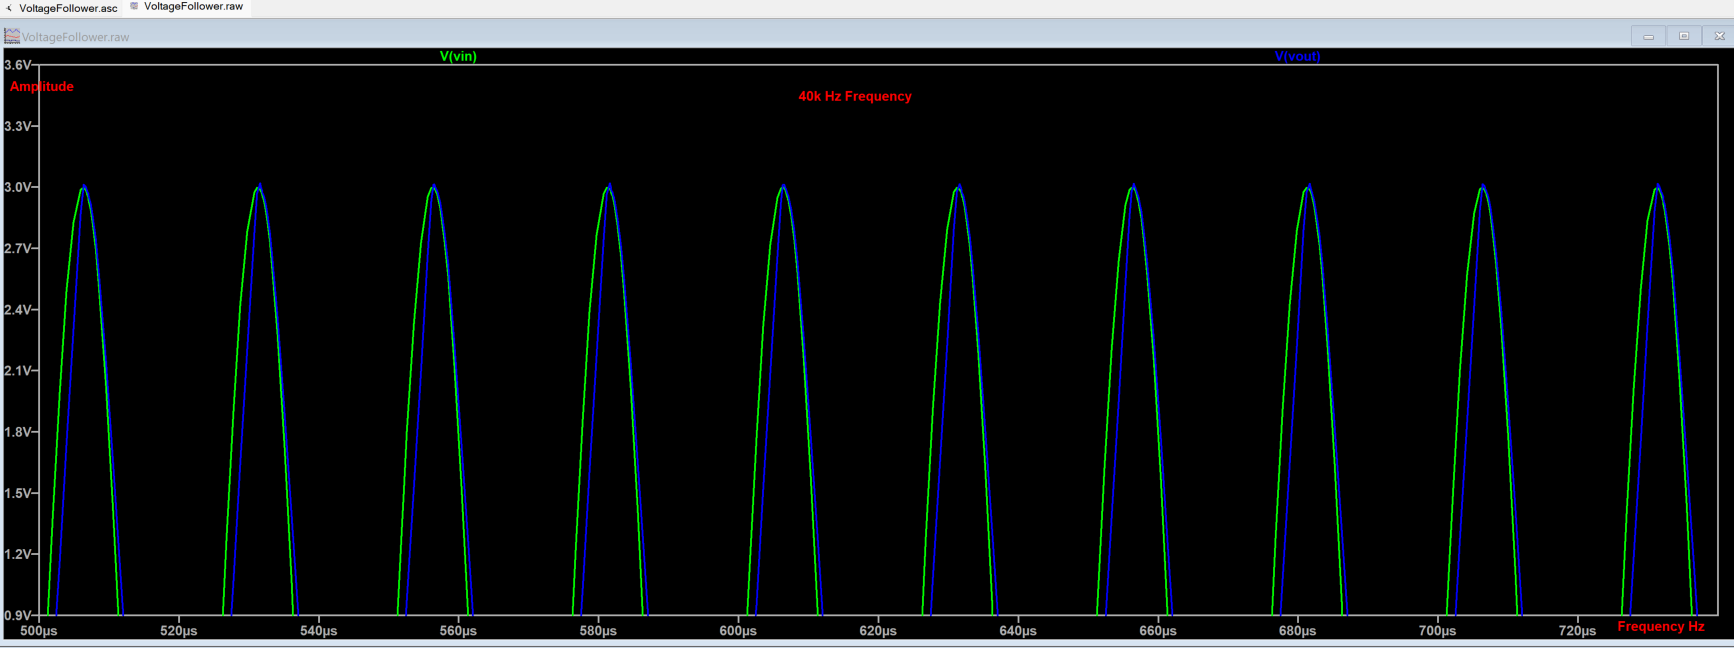

Analysis 1.3:
According to the LM348N datasheet, the typical unity-gain bandwidth of the op-amp is approximately 1 MHz, which indicates the frequency range over which the voltage follower maintains near-unity small-signal gain. In the AC sweep simulation, the closed-loop gain remains close to 1 up to around this frequency and then begins to roll off. The gain reaches 0.5 (−6 dB) at approximately 2.2 MHz, which occurs beyond the unity-gain bandwidth. This result indicates that the LTspice op-amp macromodel maintains usable gain slightly beyond the typical datasheet value, which is expected since datasheet specifications represent nominal behavior and simulation models may be optimistic..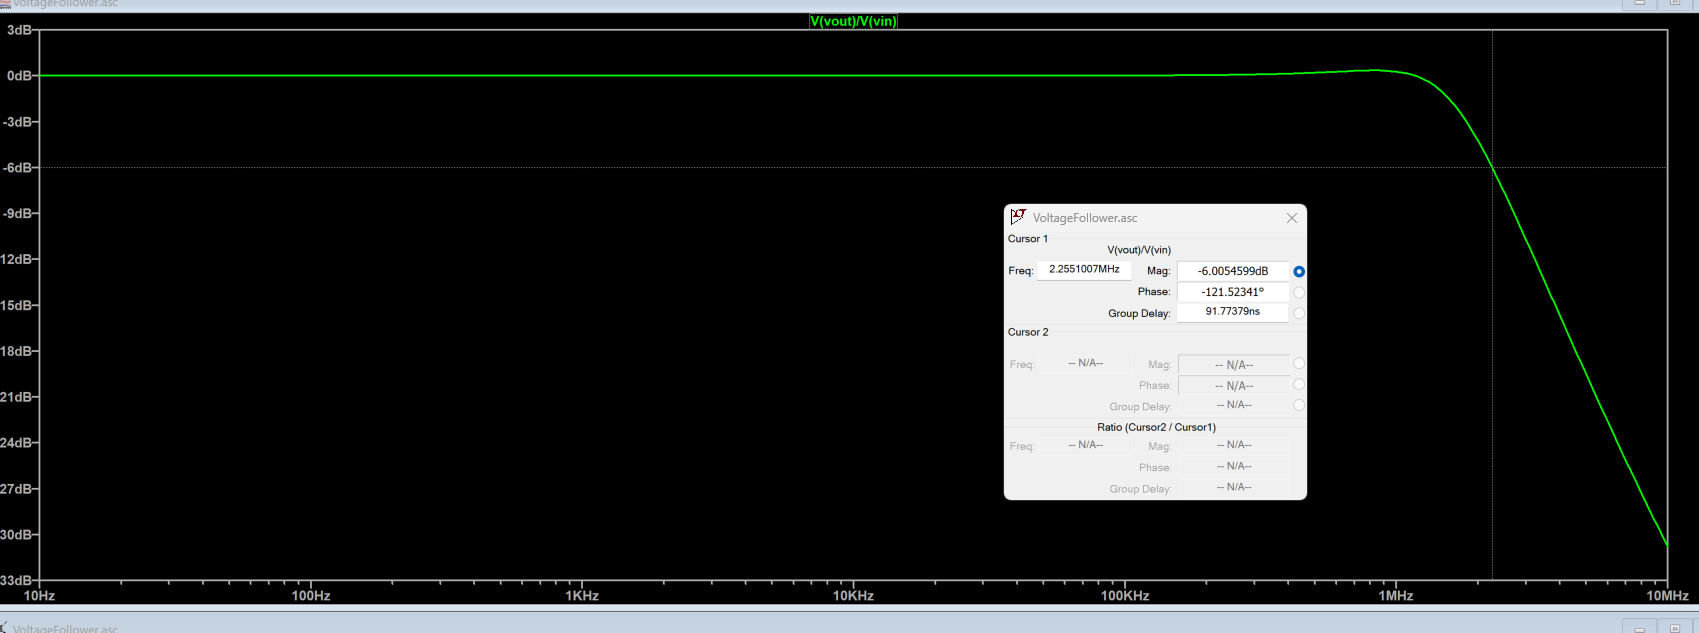

**Summary — LM348 Op-Amp Behavior (Voltage Follower)**

From transient and AC analyses of the LM348 configured as a voltage follower, we can characterize both its small-signal and large-signal limitations.

The AC sweep shows that the voltage follower maintains near-unity gain across low and mid frequencies, with gain beginning to roll off near the datasheet unity-gain bandwidth (~1 MHz). Beyond this point, the closed-loop gain gradually decreases, reaching −6 dB at approximately 2.2 MHz. This behavior reflects the finite open-loop gain and bandwidth limitations of the LM348 and is consistent with typical datasheet specifications.

Transient analysis reveals a separate, large-signal limitation caused by the finite slew rate of the op-amp. By measuring the output rise and fall times, the slew rate was estimated to be close to the datasheet value (~0.5 V/µs). When driven with a 3 V amplitude sine wave, the output waveform begins to show noticeable distortion around 30 kHz and becomes more pronounced at higher frequencies. This distortion occurs well below the small-signal bandwidth limit and is caused by the op-amp’s inability to change its output voltage fast enough to track the input.

Together, these results demonstrate that the LM348 exhibits two distinct performance limits:
(1) a small-signal bandwidth limit governed by unity-gain bandwidth, observable in AC analysis, and
(2) a large-signal slew-rate limit that causes time-domain distortion at much lower frequencies, observable only in transient analysis.

This characterization establishes realistic operating bounds for the LM348 and provides the foundation for interpreting its behavior in later summing, filtering, and equalizer circuits.

**Procedure 2 – Summing Amplifier** 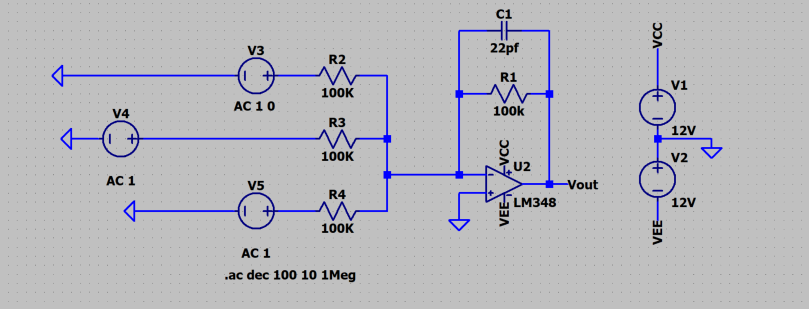

**Suuming Low pass with C= 22 Pf, -3dB frequency is about 62 KHz**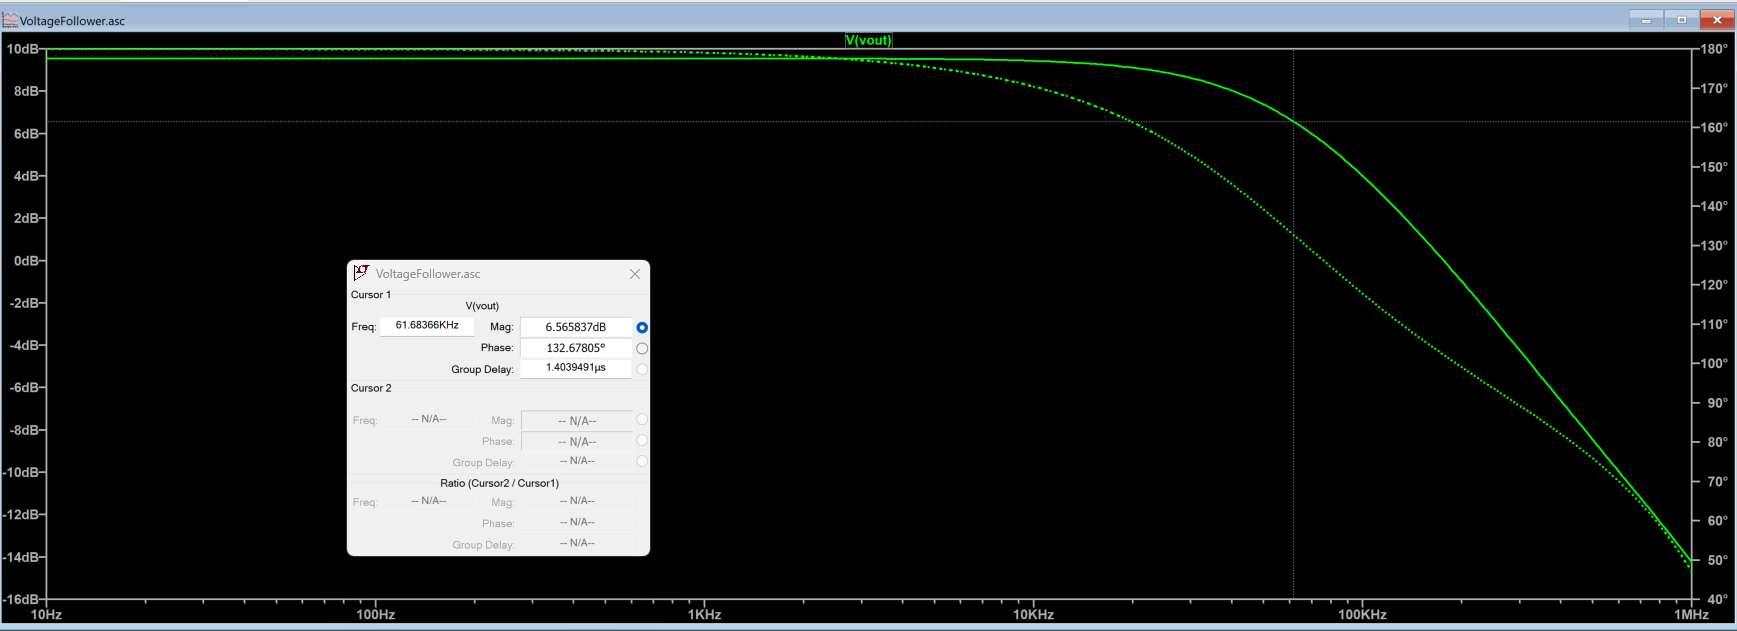

**Summing Low pass Opamp with C = 1 nF, for Lower Cutoff Frequency** 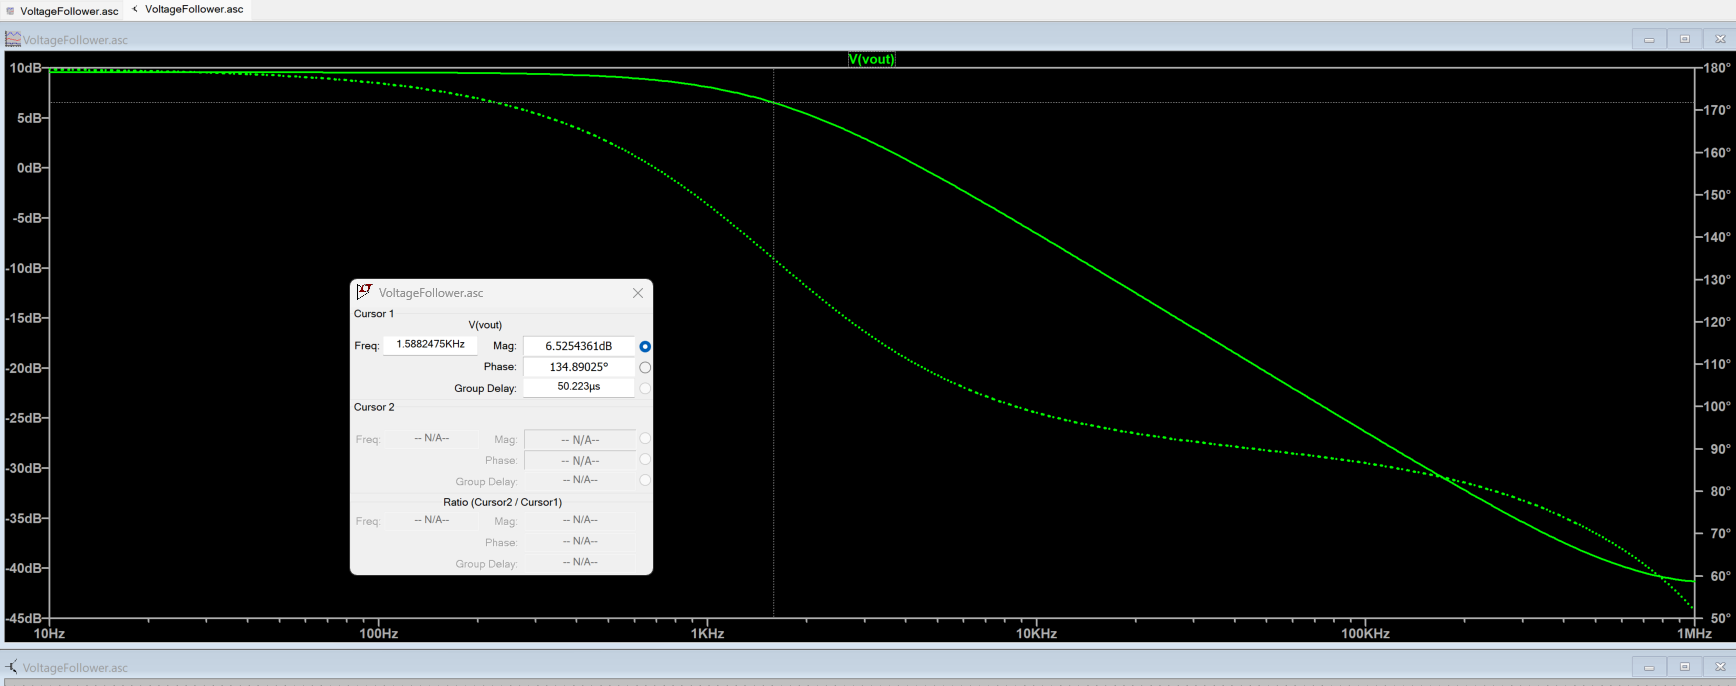


**Purpose of Summing Low-Pass Filter Analysis:**
This analysis demonstrates how a summing amplifier with a feedback capacitor can function as an audio mixer that selectively attenuates high-frequency noise while preserving desired audio signals. AC analysis is used to identify the cutoff frequency of the circuit, while transient and listening tests illustrate how high-frequency components affect the output waveform and perceived sound quality. By modifying the feedback capacitor, the cutoff frequency is shifted to more effectively suppress unwanted high-frequency content, highlighting the practical role of filters in real-world audio systems.  

This analysis shows how frequency-domain filtering, not just gain scaling, is essential for controlling noise in real audio mixers.

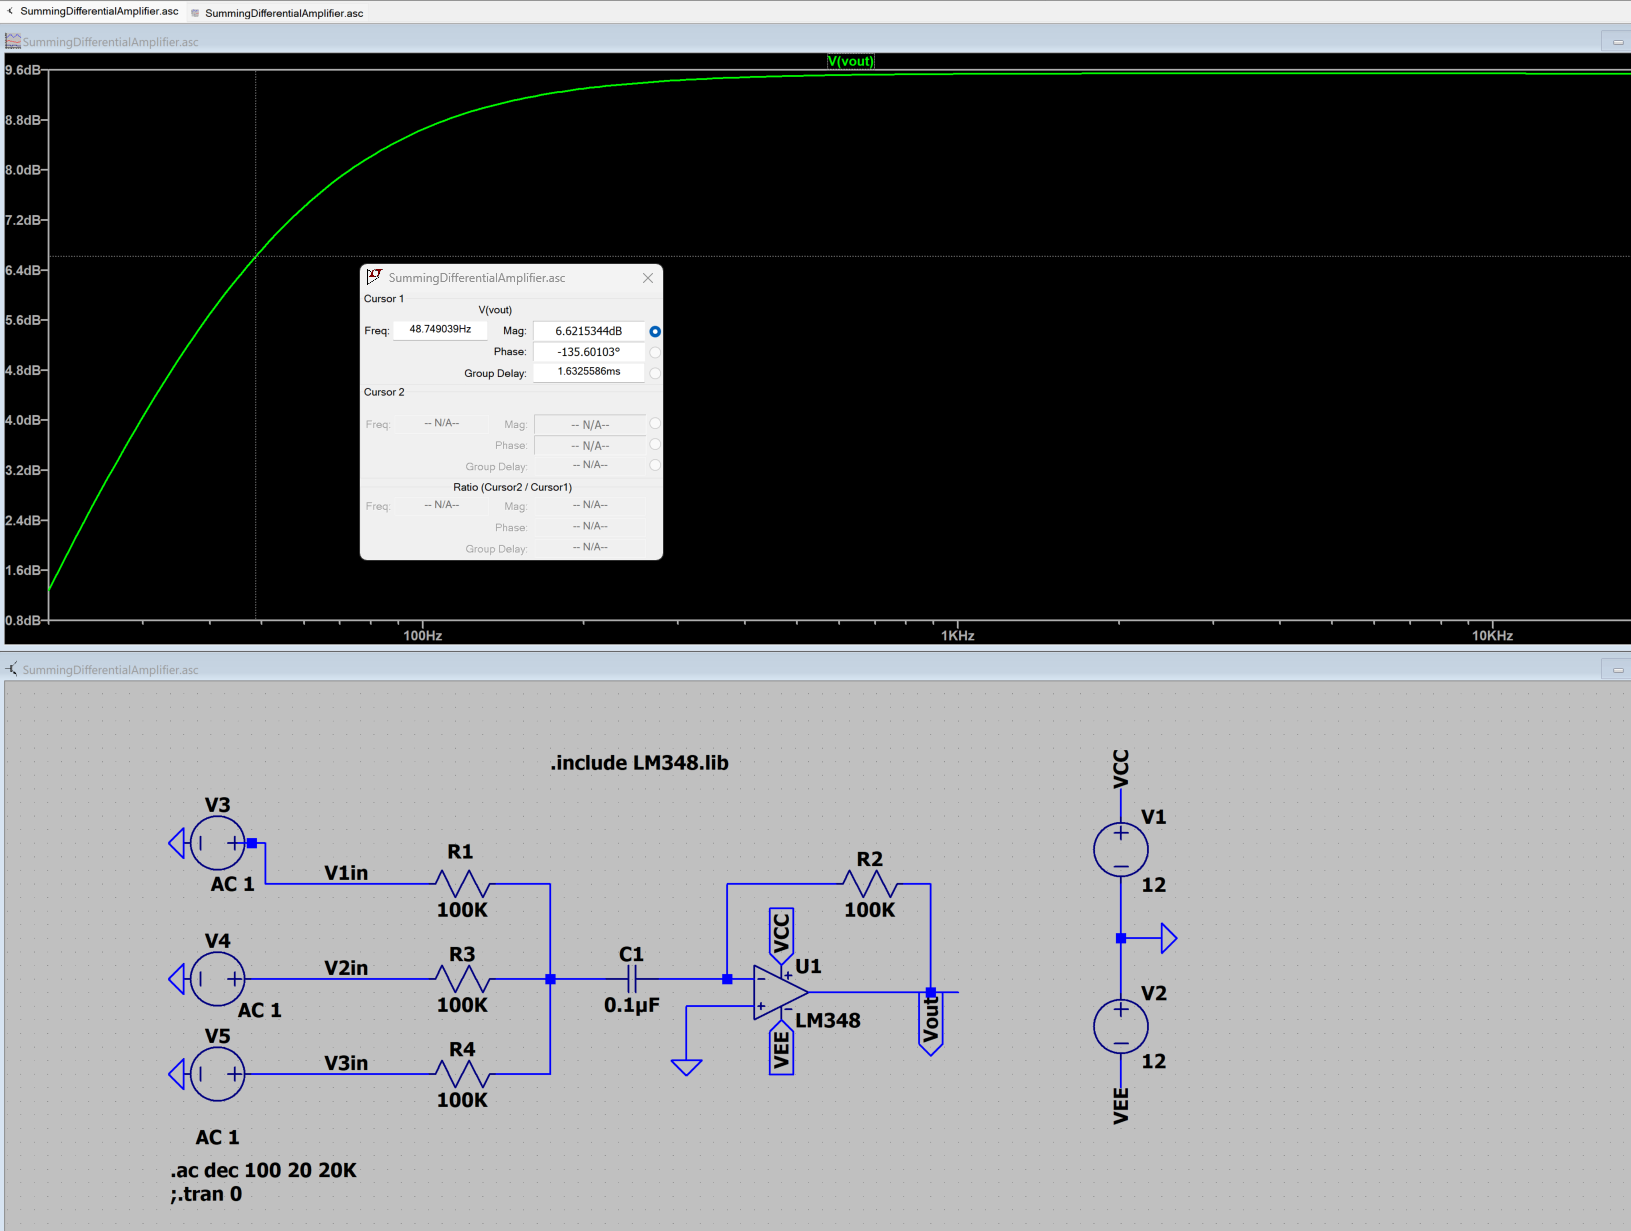

**Pream with Shunt Resistance** 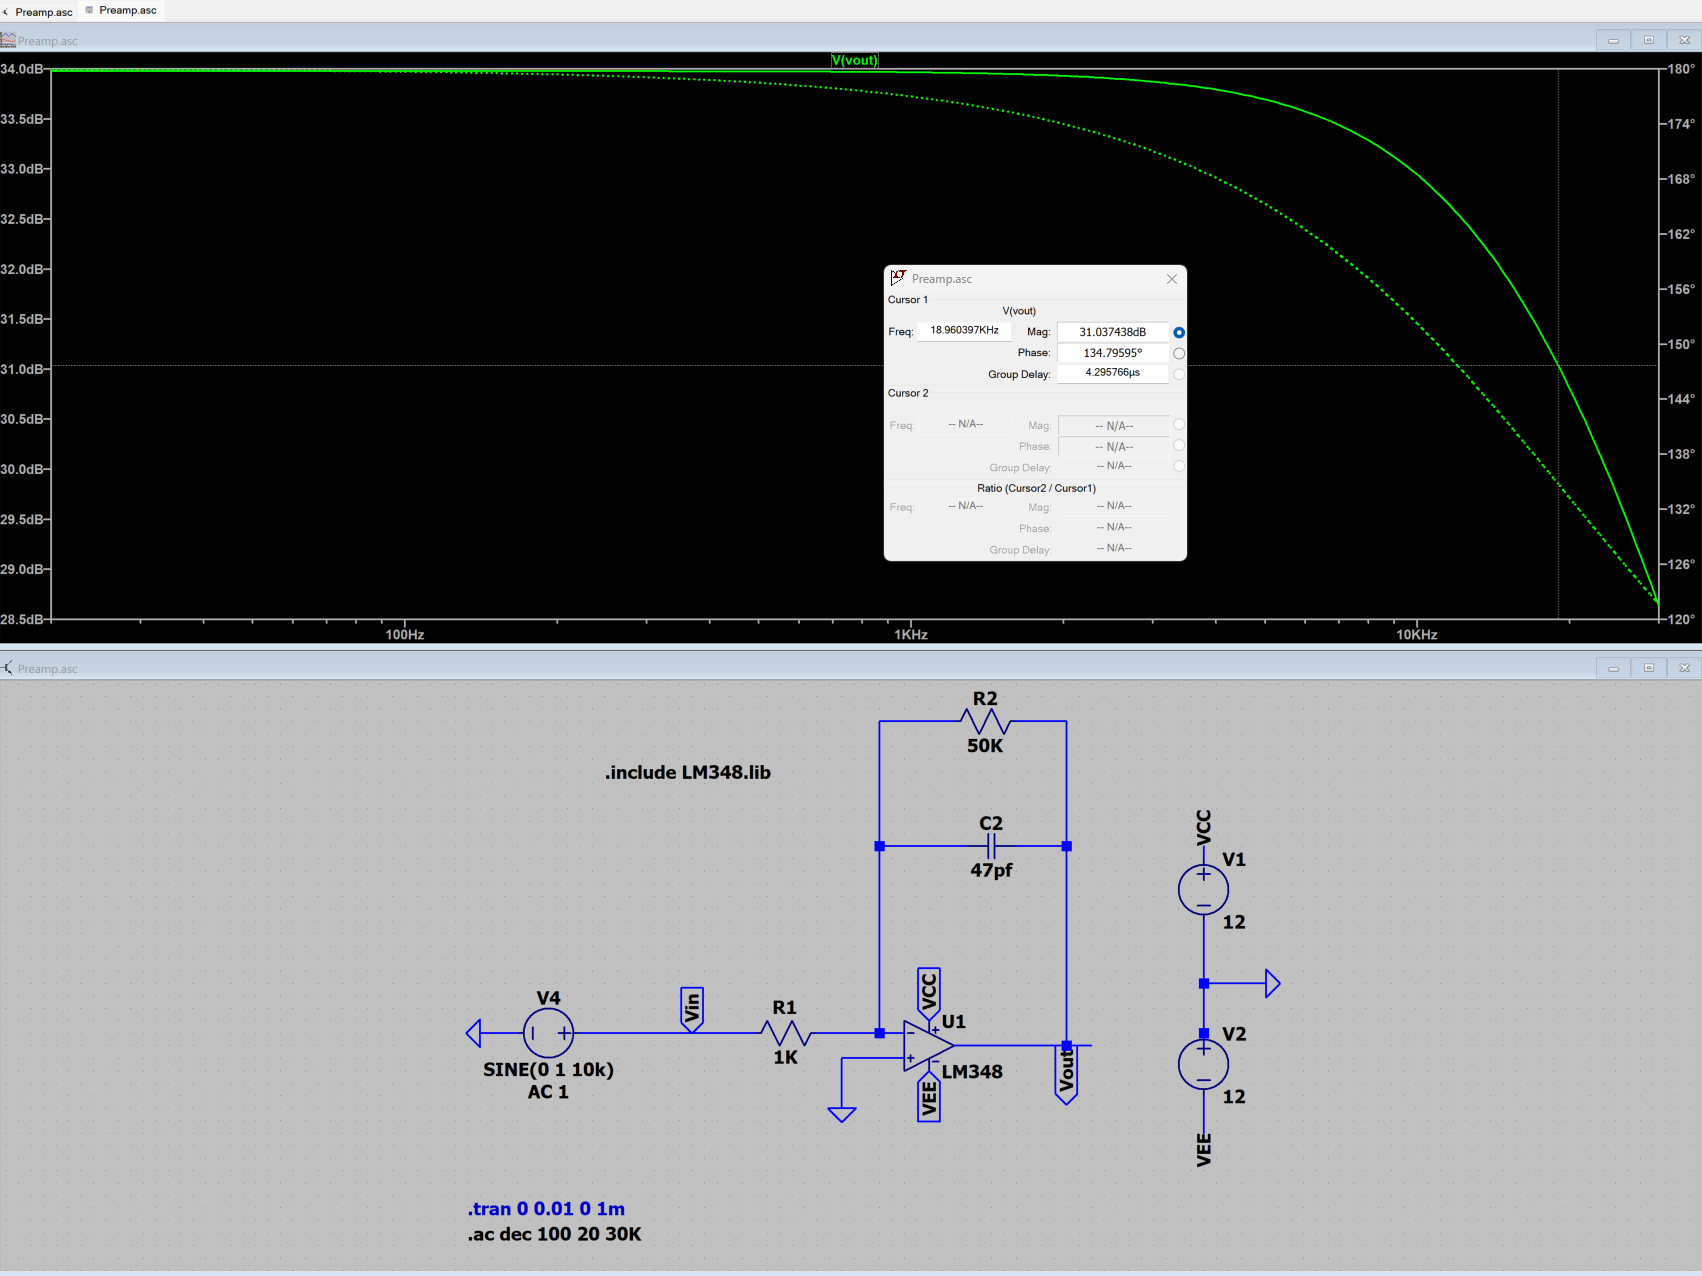

**Preamp without Shunt Resistance**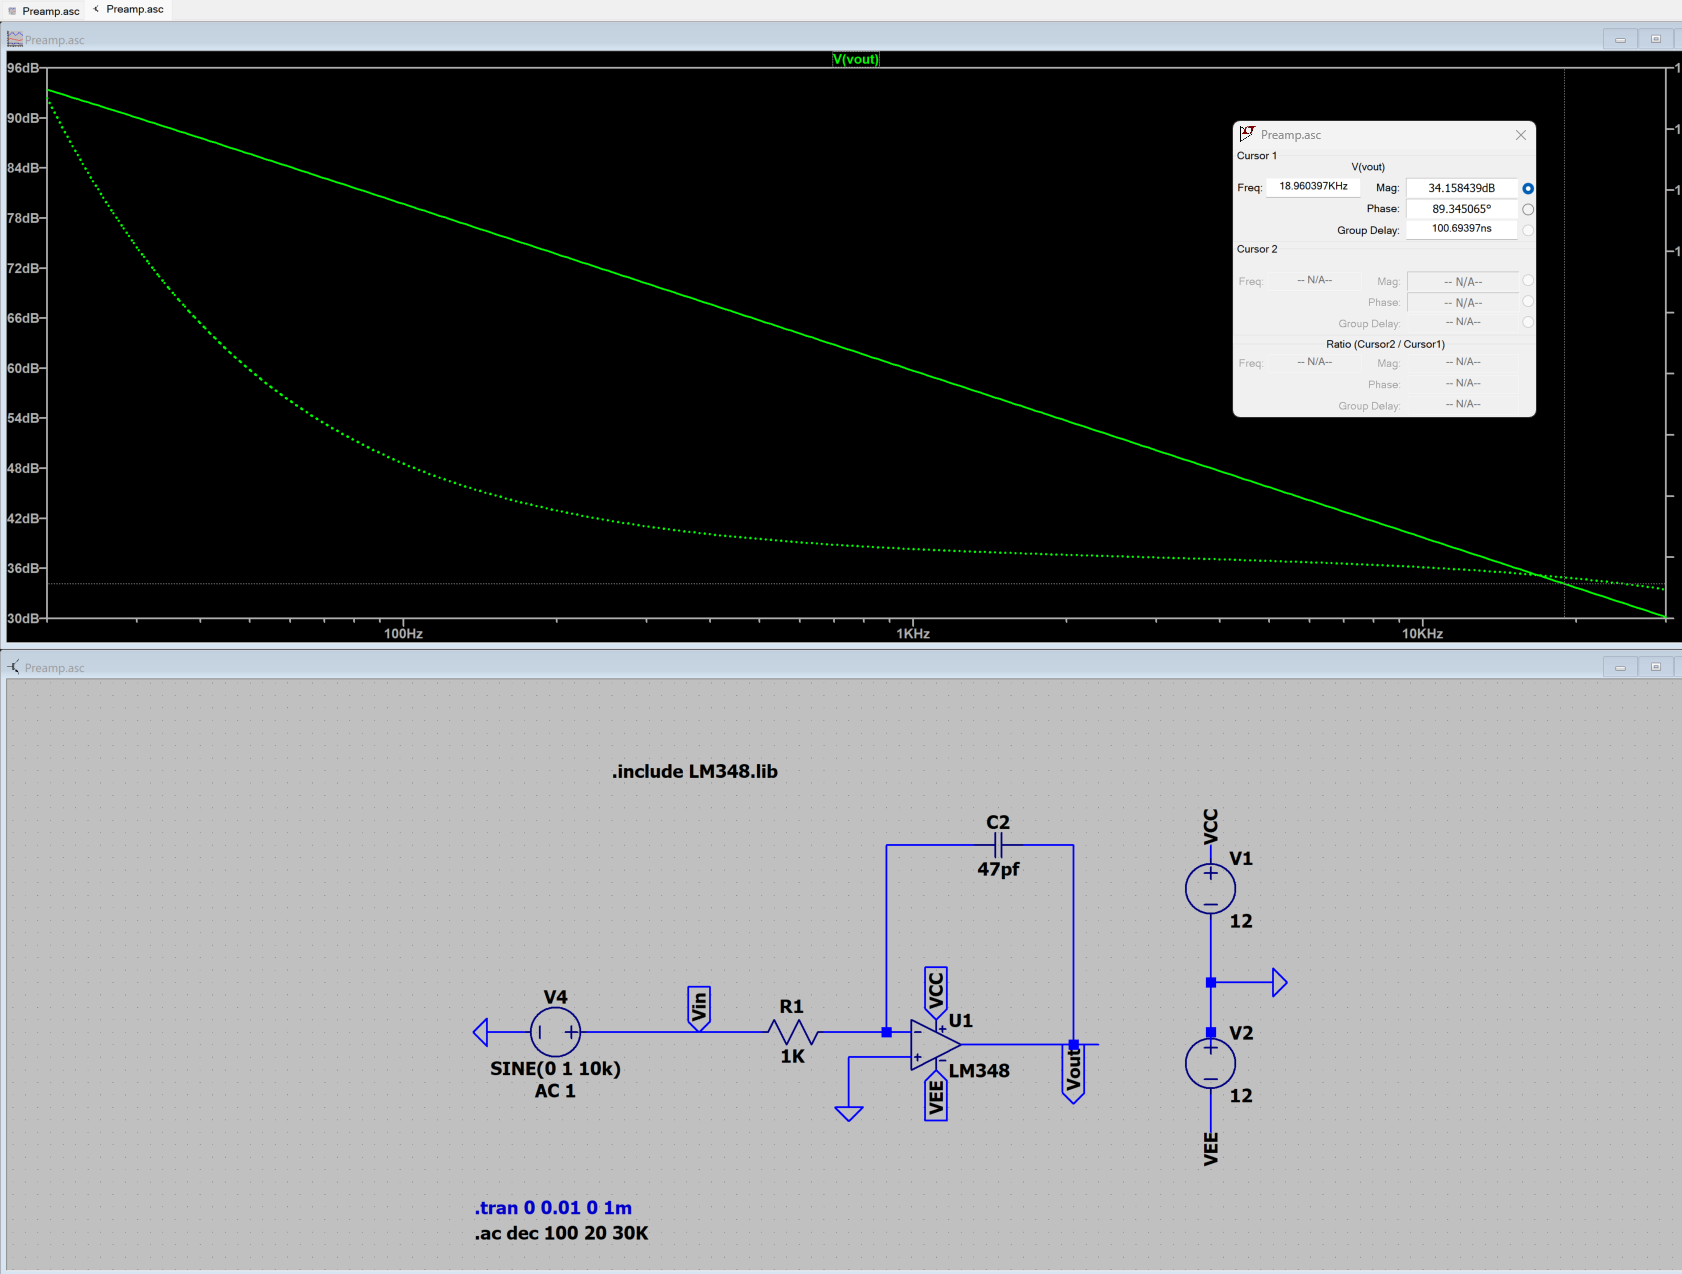

**Equalizer with 550 Hz Target frequency**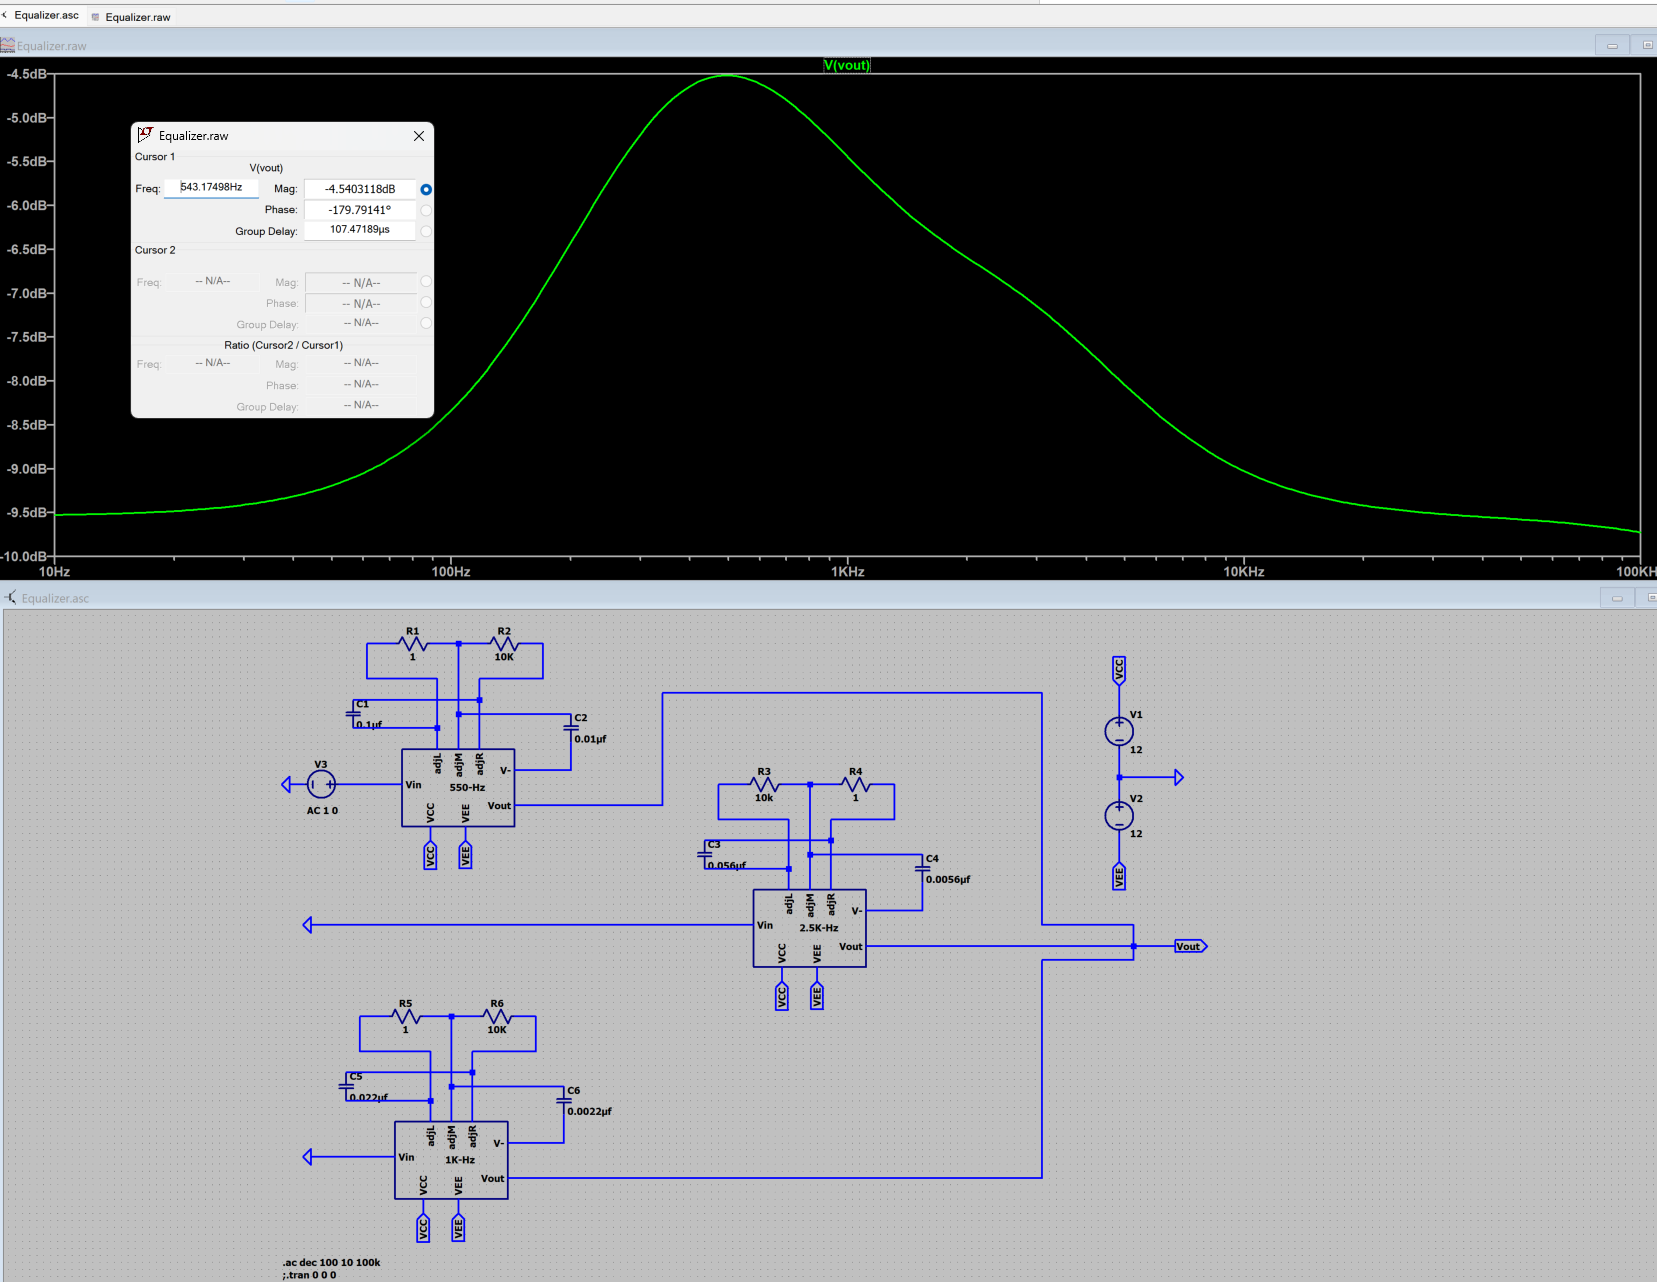

**Equalizer with 1K Hz band reject Center Frequency**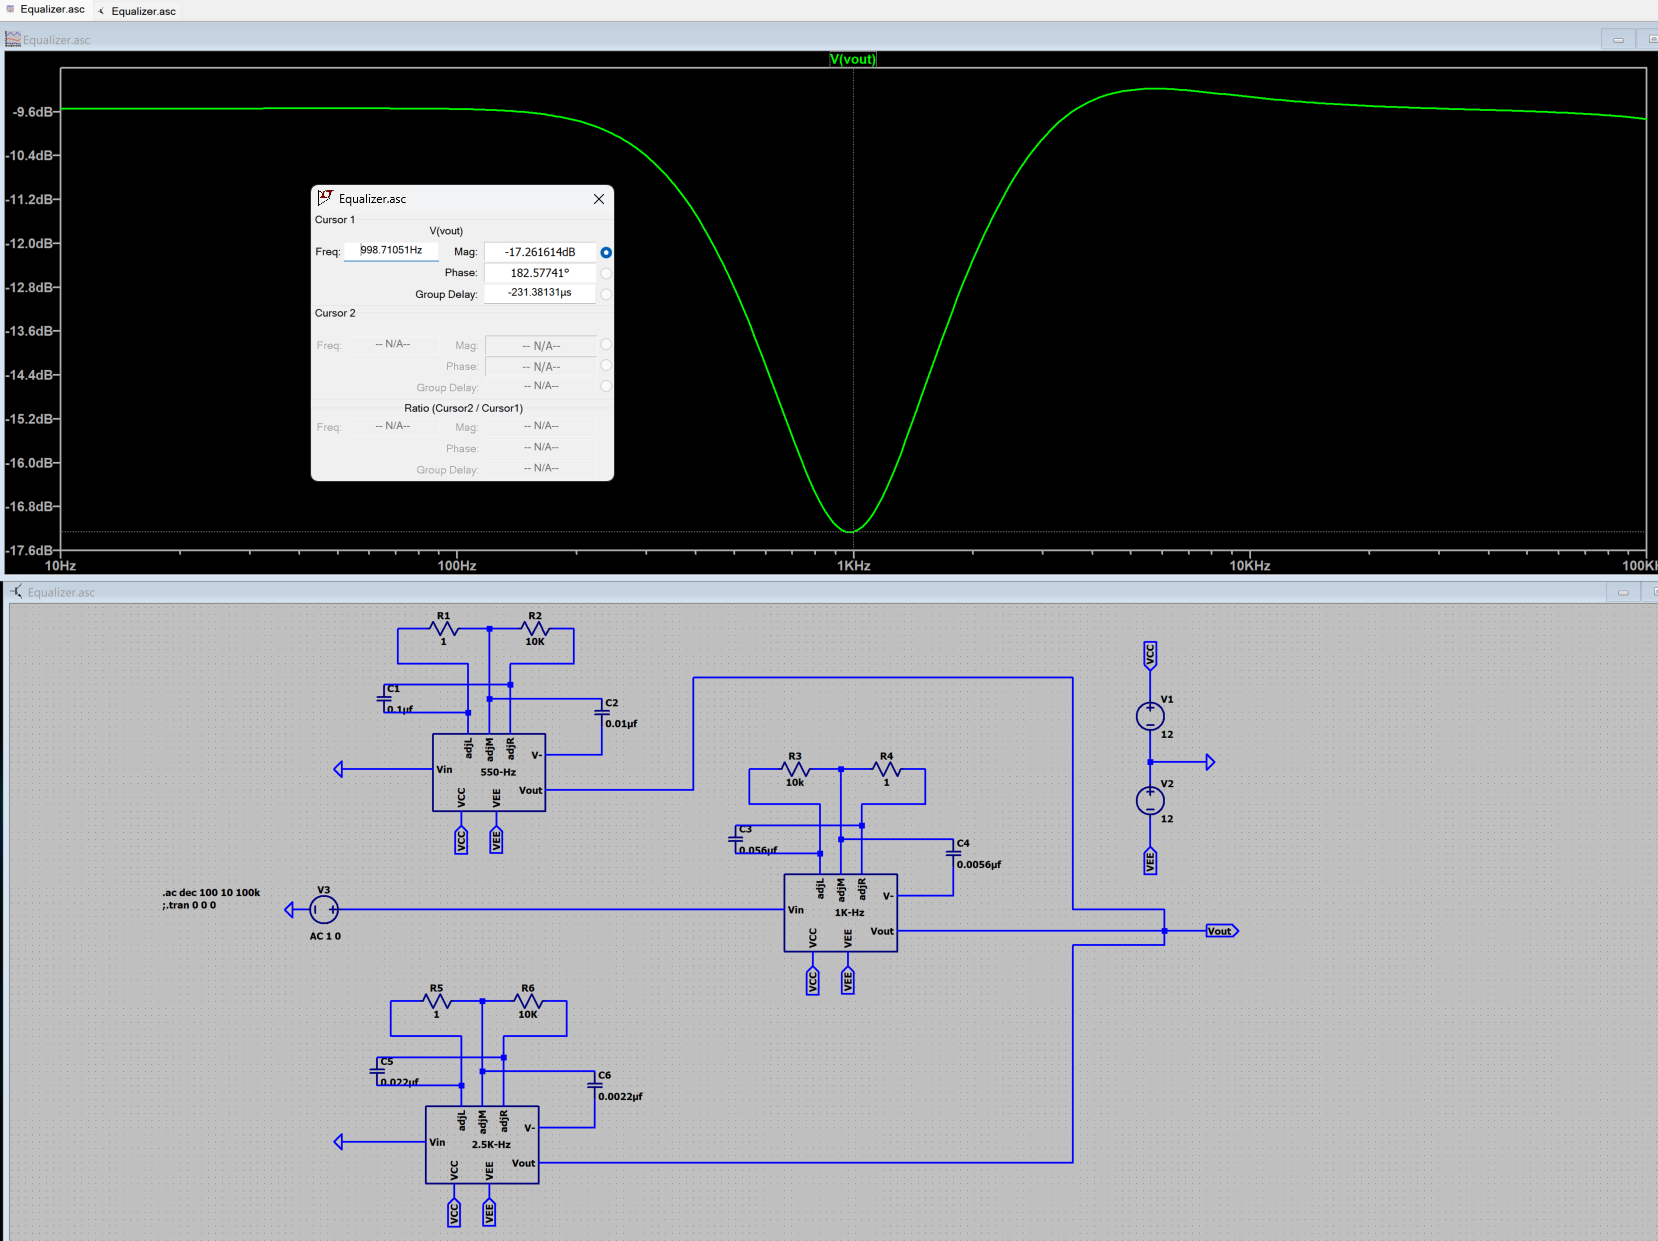

**Equalizer with 2.5K Hz Band Pass Center frequency**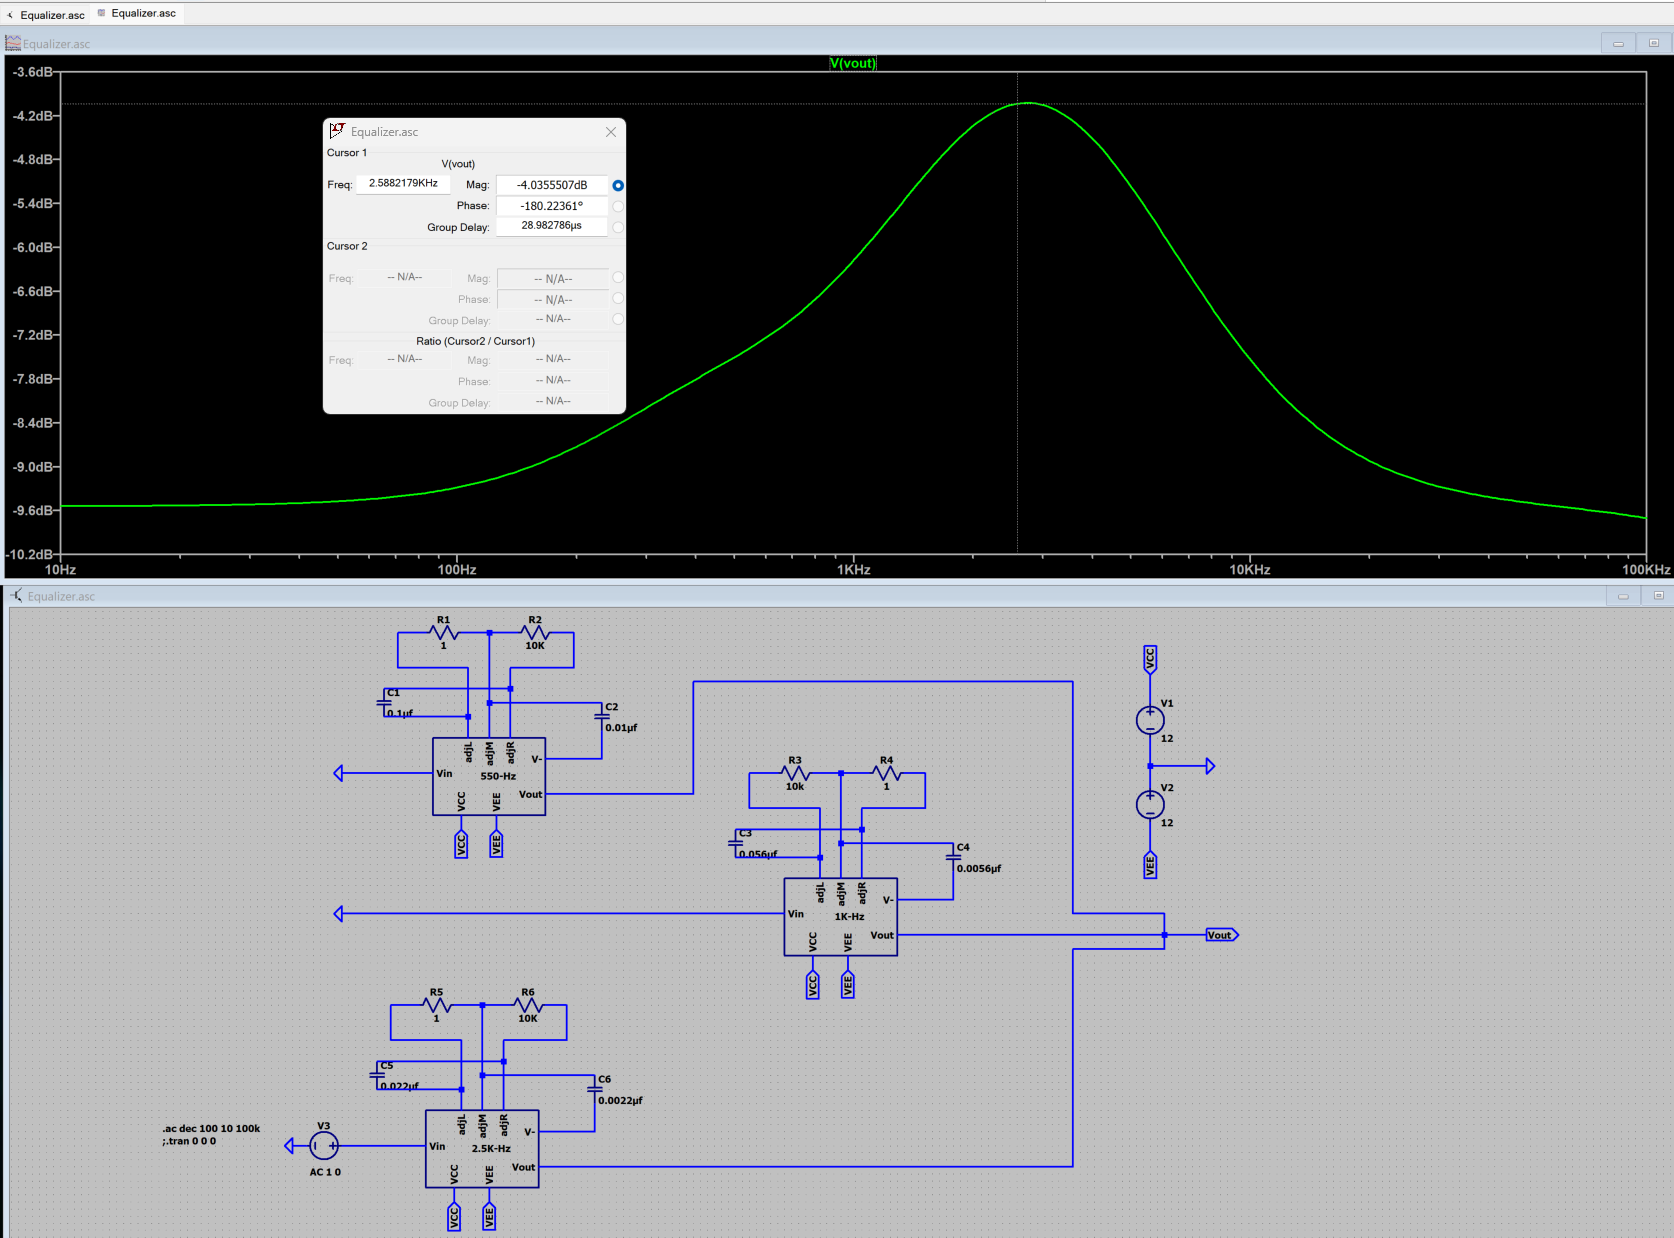